# Programming Assignment: Build a CNN for image recognition.

### Name: Wyatt Blair


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accuracy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.


4. Upload the .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. On Canvas, submit the Google Drive/Dropbox/Github link to the HTML file.


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    
    encoded_vec = np.zeros((y.shape[0], num_class))
    encoded_vec[range(len(y)), y.squeeze()] = 1

    return encoded_vec

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = np.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [5]:
def get_initial_model():
    model = Sequential(name='initial')
    
    # First Conv2D
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))

    # Second Conv2D
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten Tensor
    model.add(Flatten())

    # Run through dense layers to obtain (n, 10)-shaped vector
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [6]:
# try adding more Conv2D layers
def get_improved_model_v01():

    model = Sequential(name='improved-v01')

    # First Conv2D
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))

    # Second Conv2D
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Third Conv2D
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Fourth Conv2D
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten Tensor
    model.add(Flatten())

    # Run through dense layers to obtain (n, 10)-shaped vector
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model


In [7]:
# try adding regularization layers
def get_improved_model_v02():

    model = Sequential(name='improved-v02')

    # First Conv2D
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))

    # Second Conv2D
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # First Dropout Layer
    model.add(Dropout(rate=0.1))

    # Third Conv2D
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Fourth Conv2D
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten Tensor
    model.add(Flatten())

    # Run through dense layers to obtain (n, 10)-shaped vector
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [8]:
# try adding batch-normalization layers
def get_improved_model_v03():

    model = Sequential(name='improved-v03')

    # First Conv2D
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second Conv2D
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # First Dropout Layer
    model.add(Dropout(rate=0.1))

    # Third Conv2D
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fourth Conv2D
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Flatten Tensor
    model.add(Flatten())

    # Run through dense layers to obtain (n, 10)-shaped vector
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [9]:
# rearrange/modify arcitecture 
def get_improved_model_v04():

    model = Sequential(name='improved-v04')

    # First Conv2D
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # First Dropout Layer
    model.add(Dropout(rate=0.15))

    # Second Conv2D
    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third Conv2D
    model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Flatten Tensor
    model.add(Flatten())

    # Run through dense layers to obtain (n, 10)-shaped vector
    model.add(Dense(256, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [10]:
# rearrange/modify arcitecture 
def get_improved_model_v05():

    model = Sequential(name='improved-v05')

    # First Conv2D
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization(momentum=0.999))
    model.add(MaxPooling2D((2, 2)))

    # First Dropout Layer
    model.add(Dropout(rate=0.001))

    # Second Conv2D
    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third Conv2D
    model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Fourth Conv2D
    model.add(Conv2D(256, (1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fifth Conv2D
    model.add(Conv2D(512, (1, 1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second Dropout Layer
    model.add(Dropout(rate=0.05))

    # Flatten Tensor
    model.add(Flatten())

    # Run through dense layers to obtain (n, 10)-shaped vector
    model.add(Dense(256, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [11]:
# model we were given
initial = get_initial_model()

# my models
improved_v01 = get_improved_model_v01()
improved_v02 = get_improved_model_v02()
improved_v03 = get_improved_model_v03()
improved_v04 = get_improved_model_v04()
improved_v05 = get_improved_model_v05()

# making lists for organization purposes
models = [
    initial, 
    improved_v01, 
    improved_v02, 
    improved_v03,
    improved_v04,
    improved_v05,

]

models_for_training = models

/Users/wyatthenryblair/anaconda3/envs/torch20/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# improved_v04 = get_improved_model_v04()

# models_for_training = [
#     improved_v04
# ]

In [13]:
initial.summary()

Model: "initial"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
improved_v01.summary()

Model: "improved-v01"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,906 (1.99 MB)

 Trainable params: 520,906 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
improved_v02.summary()

Model: "improved-v02"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,906 (1.99 MB)

 Trainable params: 520,906 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
improved_v03.summary()

Model: "improved-v03"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,826 (1.99 MB)

 Trainable params: 521,866 (1.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [17]:
improved_v04.summary()

Model: "improved-v04"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,272 (2.12 MB)

 Trainable params: 555,824 (2.12 MB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
improved_v05.summary()

Model: "improved-v05"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 256)      │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 748,528 (2.86 MB)

 Trainable params: 746,544 (2.85 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [19]:
histories = {}

In [20]:
learning_rate = 1E-3 # to be tuned!
batch_size = 128
epochs = 15

for model in models_for_training:

    print(f'TRAINING: {model.name}')

    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizers.RMSprop(learning_rate=learning_rate),
        metrics=['acc']
    )

    histories.update(
        {
        model.name: 
            model.fit(
                x_tr, 
                y_tr, 
                batch_size=batch_size, 
                epochs=epochs, 
                validation_data=(x_val, y_val)
            )
        }
    )

    print('='*50)



TRAINING: initial
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - acc: 0.2403 - loss: 9.6209 - val_acc: 0.3888 - val_loss: 1.7982
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - acc: 0.4732 - loss: 1.5022 - val_acc: 0.5240 - val_loss: 1.3767
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - acc: 0.5792 - loss: 1.2175 - val_acc: 0.5279 - val_loss: 1.3768
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - acc: 0.6462 - loss: 1.0191 - val_acc: 0.5563 - val_loss: 1.4061
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - acc: 0.6967 - loss: 0.8746 - val_acc: 0.5986 - val_loss: 1.2636
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - acc: 0.7478 - loss: 0.7346 - val_acc: 0.6051 - val_loss: 1.3726
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - acc: 0.7946 - loss: 0.6054 - val_acc: 0.5859 - val_loss: 1.7402
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - acc: 0.8270 - loss: 0.5076 - val_acc: 0.5949 - val_loss: 1.6341
Epoch 9/15
313/313 ━━━━━

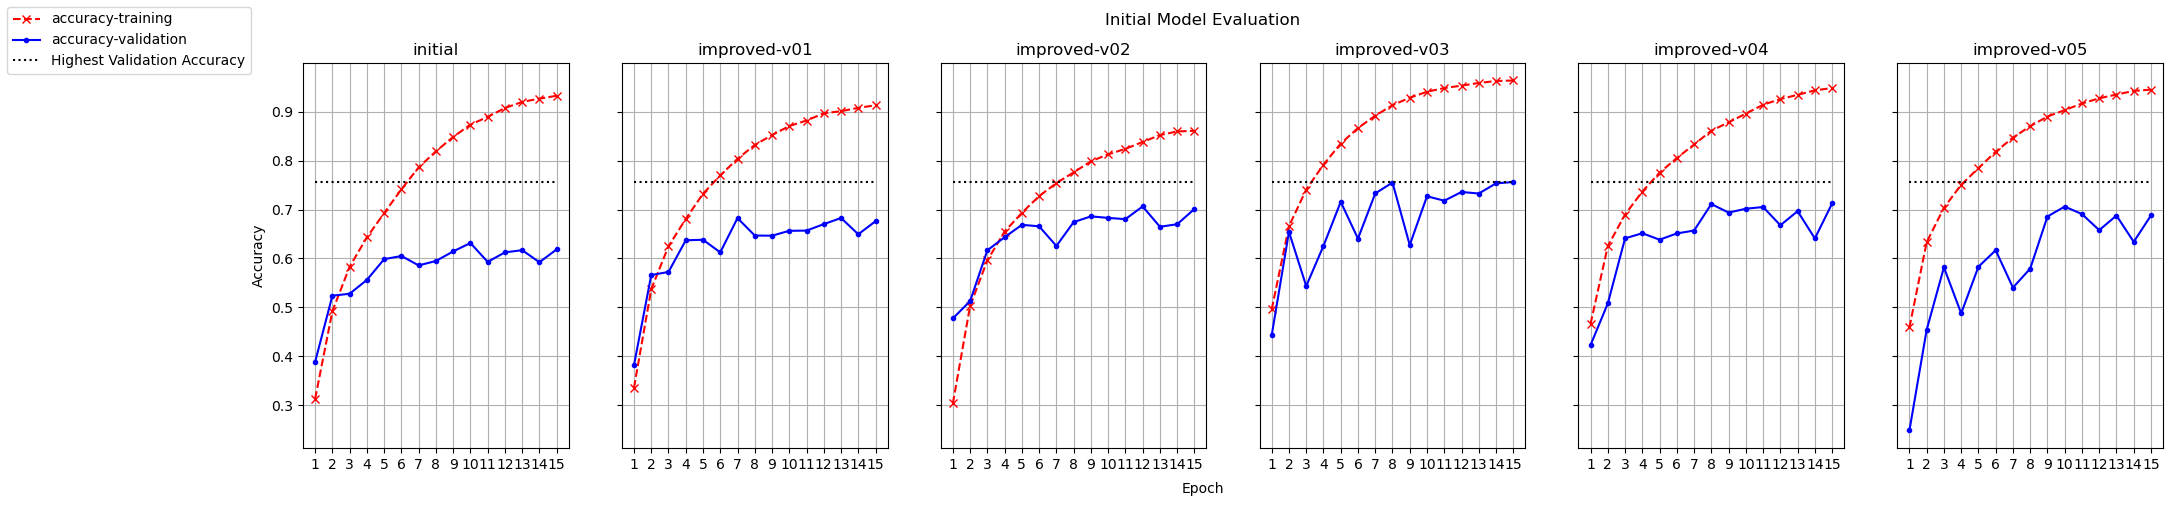

In [21]:
fig, axs = plt.subplots(1, len(models), figsize=(4*len(models), 5), sharey=True)
val_accs = []

for ind, (acc_ax, (model_name, history)) in enumerate(zip(axs, histories.items())):

    # unpack data
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc)+1)

    val_accs.append(val_acc)

    # annotate subplot
    acc_ax.grid()
    acc_ax.set_xticks(epochs)
    acc_ax.set_title(model_name)

    if ind == 0:
        acc_ax.set_ylabel('Accuracy')

    # plot data on subplot
    acc_ax.plot(epochs, acc, marker='x', linestyle='--', label=f'accuracy-training', color='red')
    acc_ax.plot(epochs, val_acc, marker='.', label=f'accuracy-validation', color='blue')

val_accs = np.array(val_accs)
max_val_acc = val_accs.max()

for acc_ax in axs:
    
    acc_ax.plot([min(epochs), max(epochs)], [max_val_acc, max_val_acc], linestyle=':', color='black', label='Highest Validation Accuracy')

fig.text(0.5, 0.02, 'Epoch', ha='center')
plt.suptitle('Initial Model Evaluation')

handles, labels = acc_ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [24]:
# select one of the 5 models I wrote

selected_model = improved_v03

In [25]:
learning_rate = 5E-5 # to be tuned!
batch_size = 16
epochs = 20

secondary_histories = {}
for model in [initial, selected_model]:

    print(f'TRAINING: {model.name}')

    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizers.RMSprop(learning_rate=learning_rate),
        metrics=['acc']
    )

    secondary_histories.update(
        {
        model.name: 
            model.fit(
                x_train, 
                y_train_vec, 
                batch_size=batch_size, 
                epochs=epochs, 
            )
        }
    )

    print(f'EVALUATING: {model.name}')
    
    loss_and_acc = model.evaluate(x_test, y_test_vec)
    print(f'{model.name}-test-loss = ' + str(loss_and_acc[0]))
    print(f'{model.name}-test-accuracy = ' + str(loss_and_acc[1]))

    print('='*50)


TRAINING: initial
Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - acc: 0.9117 - loss: 0.4520
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - acc: 0.9178 - loss: 0.4020
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - acc: 0.9214 - loss: 0.3762
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - acc: 0.9300 - loss: 0.3331
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - acc: 0.9338 - loss: 0.3009
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - acc: 0.9373 - loss: 0.2835
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - acc: 0.9400 - loss: 0.2740
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - acc: 0.9450 - loss: 0.2450
Epoch 9/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - acc: 0.9477 - loss: 0.2305
Epoch 10/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - acc: 0.9496 - loss: 0.2055
Epoch 11/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - acc: 0.9503 - loss: 0.2111
Epoch 12/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step 

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [26]:
for model in [initial, selected_model]:
    loss_and_acc = model.evaluate(x_test, y_test_vec)
    print(f'{model.name}-test-loss = ' + str(loss_and_acc[0]))
    print(f'{model.name}-test-accuracy = ' + str(loss_and_acc[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6437 - loss: 3.4736
initial-test-loss = 3.4684367179870605
initial-test-accuracy = 0.6495000123977661
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.7953 - loss: 1.3910
improved-v03-test-loss = 1.3973554372787476
improved-v03-test-accuracy = 0.7940000295639038


### So the improved-v03 model achieves an 80% accuracy rating on the test set!

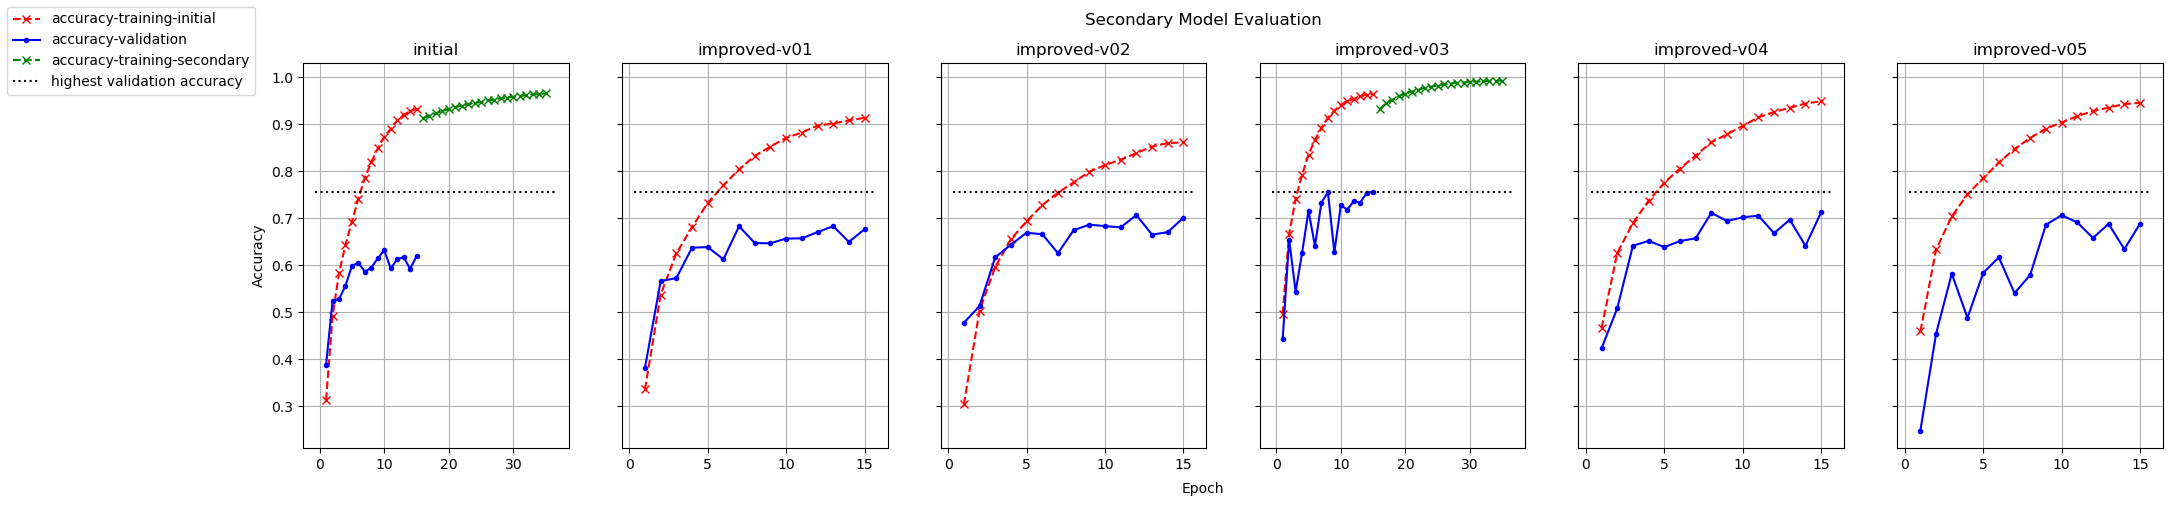

In [54]:
fig, axs = plt.subplots(1, len(models), figsize=(4*len(models), 5), sharey=True)
val_accs = []

for ind, (acc_ax, (model_name, history)) in enumerate(zip(axs, histories.items())):

    acc_ax.set_title(model_name)

    # unpack data
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    first_epochs = range(1, len(acc)+1)

    val_accs.append(val_acc)

    if ind == 0:
        acc_ax.set_ylabel('Accuracy')

    # plot data on subplot
    acc_ax.plot(first_epochs, acc, marker='x', linestyle='--', label=f'accuracy-training-initial', color='red')
    acc_ax.plot(first_epochs, val_acc, marker='.', label=f'accuracy-validation', color='blue')

for acc_ax in axs:

    model_name = acc_ax.get_title()
    if model_name not in secondary_histories.keys(): continue

    acc = secondary_histories[model_name].history['acc']

    # annotate subplot
    secondary_epochs = np.arange(start=max(first_epochs), stop=max(first_epochs)+len(acc)) + 1

    # plot data on subplot
    acc_ax.plot(secondary_epochs, acc, marker='x', linestyle='--', label=f'accuracy-training-secondary', color='green')

val_accs = np.array(val_accs)
max_val_acc = val_accs.max()

for acc_ax in axs:
    acc_ax.plot(acc_ax.get_xlim(), [max_val_acc, max_val_acc], linestyle=':', color='black', label='highest validation accuracy')
    acc_ax.grid()

    model_name = acc_ax.get_title()
    if model_name not in secondary_histories.keys(): continue
    handles, labels = acc_ax.get_legend_handles_labels()
    

fig.text(0.5, 0.02, 'Epoch', ha='center')
plt.suptitle('Secondary Model Evaluation')

by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.show()